In [9]:
from commonfunctions import *

In [106]:
#cell for pictures insertion

rose=io.imread("Q3.jpg")
lana=io.imread("Q4.jpg")
bird=io.imread("bird.jpg")
f1=io.imread("f1.jpg")
f2=io.imread("f2.jpg")
f3=io.imread("f3.jpg")
submarine=io.imread("submarine.png")
lily=io.imread("lily.jpg")
toy1=io.imread("ffs.jpg")
toy=io.imread("figure3.jpg")

In [85]:
def white_patch(image, percentile=90):
    """
    White balance image using White patch algorithm
    Parameters
    ----------
    percentile : integer, optional
                  Percentile value to consider as channel maximum
    clip: any value less than 0 becomes zero and any value bigger than 1 is 1

    """
    white_patch_image = img_as_ubyte((image / np.percentile(image,percentile)).clip(0, 1))
    return white_patch_image

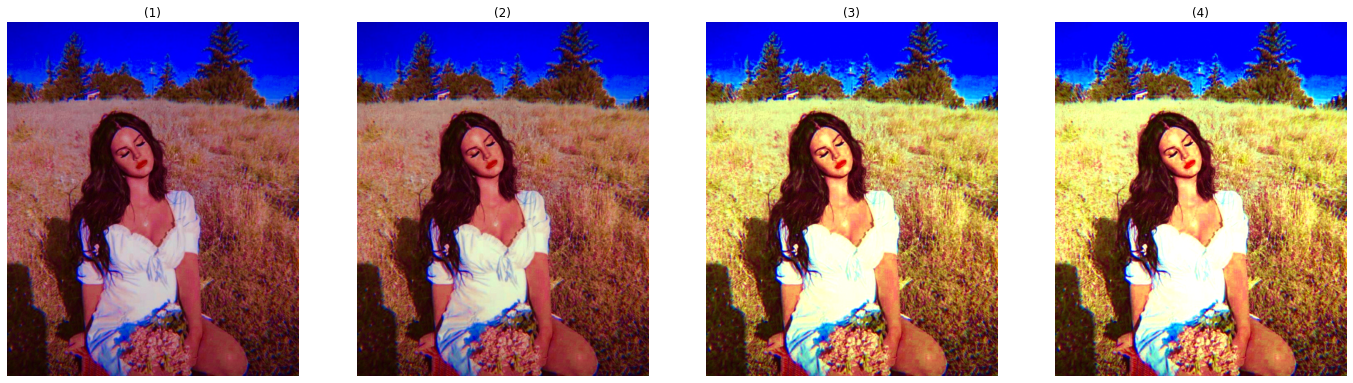

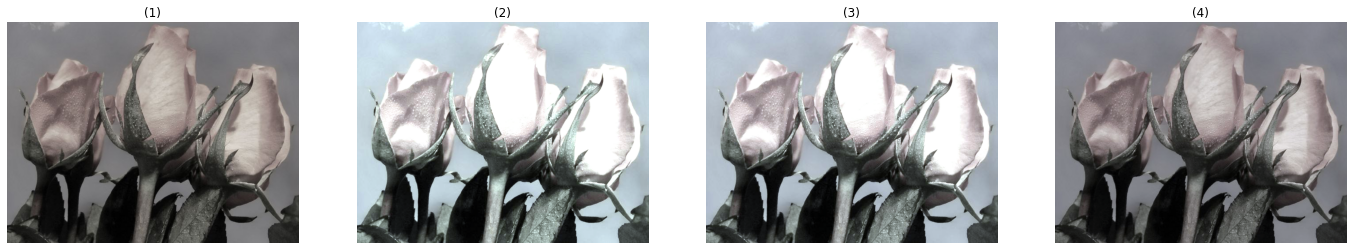

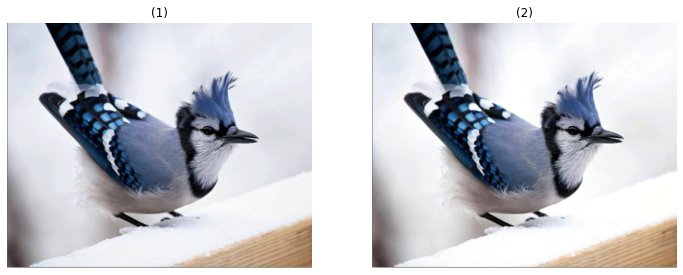

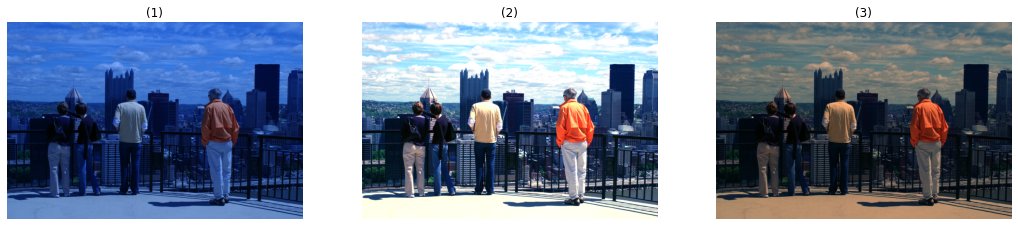

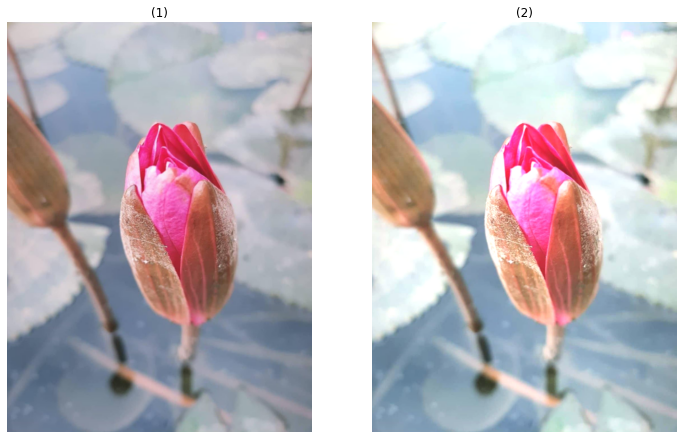

In [101]:

lanaeditwb5=white_patch(lana, 85)
lanaeditwb6=white_patch(lana, 90)
lanaeditwb7=white_patch(lana, 100)
roseeditwb5=white_patch(rose, 85)
roseeditwb6=white_patch(rose, 90)
roseeditwb7=white_patch(rose, 100)
birdeditwb7=white_patch(bird, 92)

show_images([lana, lanaeditwb7, lanaeditwb6, lanaeditwb5])
show_images([rose, roseeditwb5, roseeditwb6, roseeditwb7])
show_images([bird, birdeditwb7])

f2edit1=white_patch(f2, 90)
f2edit2=white_patch(f2, 80)
f2edit3=white_patch(f2, 70)
f3edit1=white_patch(f3, 90)
f3edit2=white_patch(f3, 80)
f3edit3=white_patch(f3, 70)


show_images([toy1, white_patch(toy1, 80),toy1editgre])

show_images([lily, white_patch(lily)])

In [109]:
def gray_world(image):
    image = image.transpose(2, 0, 1).astype(np.uint32)   # hwc -> chw (channel height width) 
    image[0] = np.minimum(image[0]*(np.average(image[1])/np.average(image[0])),255)
    image[2] = np.minimum(image[2]*(np.average(image[1])/np.average(image[2])),255)
    
    return  image.transpose(1, 2, 0).astype(np.uint8)

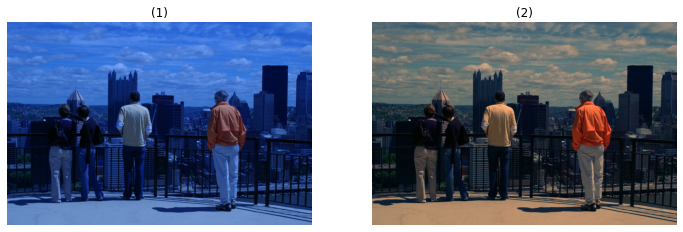

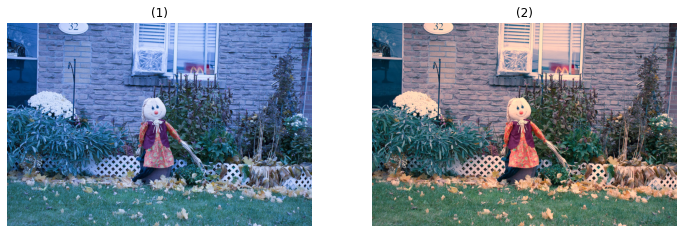

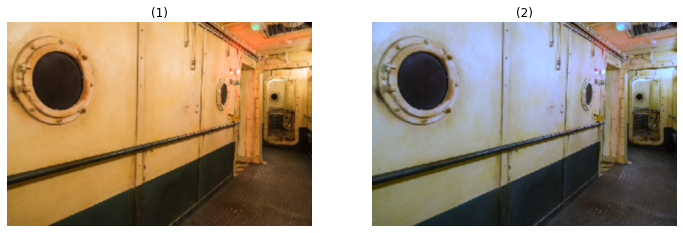

In [110]:
show_images([toy1, gray_world(toy1)])
show_images([toy, gray_world(toy)])
show_images([submarine, gray_world(submarine)])

In [27]:
def ground_truth(image, x, y, mode='mean'):   
    """
    White balance image using Ground-truth algorithm
    Parameters
    ----------
    x & y : image patch starting dimensions 
    
    mode : mean or max, optional
          Adjust mean or max of each channel to match patch
    """
    image_patch = image[x:x+100,y:y+100]
    
    if mode == 'mean':
        image_gt = ((image * (image_patch.mean() /image.mean(axis=(0,1)))).clip(0, 255).astype(int))
                       
                   
    if mode == 'max':
        image_gt = ((image * 1.0 / image_patch.max(axis=(0,1))).clip(0, 1))
                    
    
    if image.shape[2] == 4:
        image_gt[:,:,3] = 255
    return image_gt

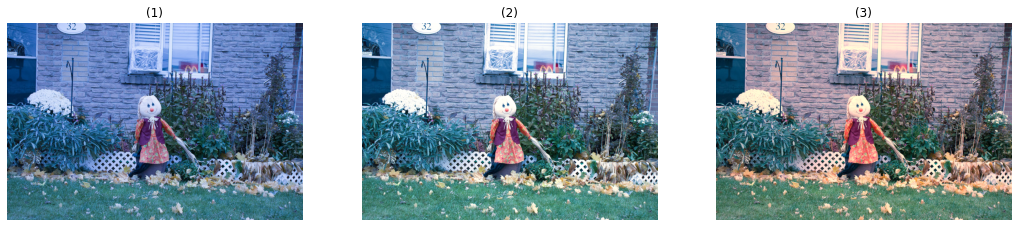

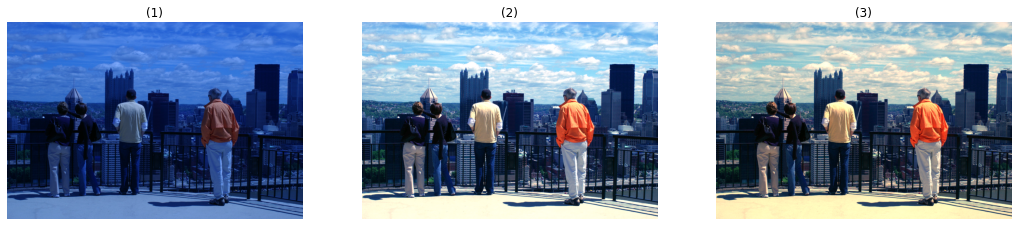

In [111]:
"""
show_images([lana, ground_truth(lana, 650, 550, 'max'), ground_truth(lana, 650, 550, 'mean')])
show_images([f2, ground_truth(f2, 100, 100, 'max'), ground_truth(f2, 300, 300, 'max')])
show_images([f3, ground_truth(f3, 100, 100, 'max'), ground_truth(f3, 100, 100, 'mean')])
"""
show_images([toy, ground_truth(toy, 330, 300, 'max'),ground_truth(toy, 300, 300, 'mean')])
show_images([toy1, ground_truth(toy1, 300, 300, 'max'),ground_truth(toy1, 300, 300, 'mean')])